In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## Data Cleaning Process

In [3]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [4]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
missing_columns = ['Drug', 'Ascites', 'Hepatomegaly', 
                   'Spiders', 'Cholesterol', 'Copper', 
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 
                   'Platelets', 'Prothrombin', 'Stage']

# Drop missing values from affected columns
df = df.dropna(subset=missing_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombin    

## Exploratory Data Analysis

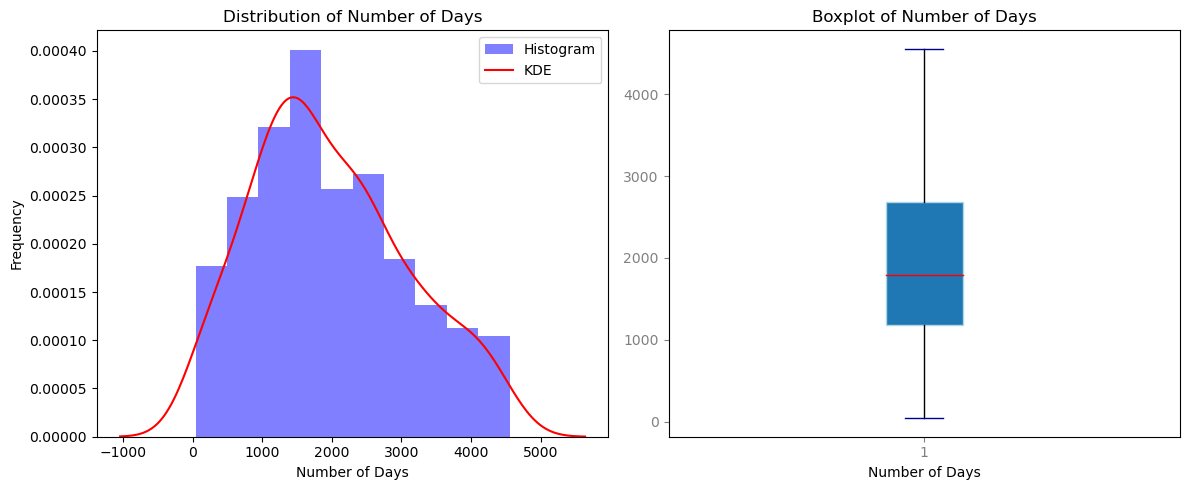

Mean number of days: 1979.1666666666667
Median number of days: 1788.0
Minimum number of days: 41
Maximum number of days: 4556


In [7]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram distribution of N_Days
axs[0].hist(df['N_Days'], density=True, alpha=0.5, color='blue', label='Histogram')
sns.kdeplot(df['N_Days'], color='red', ax=axs[0], label='KDE')

axs[0].set_title('Distribution of Number of Days')
axs[0].set_xlabel('Number of Days')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Define custom colors for the boxplot
box_color = 'lightblue'  # Color of the box
whisker_color = 'darkblue'  # Color of the whiskers
median_color = 'red'  # Color of the median line
flier_color = 'green'  # Color of the outliers

# Create a boxplot with custom colors
axs[1].boxplot(
    df['N_Days'],
    boxprops={'color': box_color},
    capprops={'color': whisker_color},
    medianprops={'color': median_color},
    flierprops={'markerfacecolor': flier_color, 'markeredgecolor': flier_color},
    patch_artist=True,  # Fill the box with color
)

axs[1].set_title('Boxplot of Number of Days')
axs[1].set_xlabel('Number of Days')

# Customize the x-axis and y-axis tick colors if needed
axs[1].tick_params(axis='x', colors='gray')
axs[1].tick_params(axis='y', colors='gray')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

mean_days = np.mean(df['N_Days'])
median_days = np.median(df['N_Days'])
min_days = np.min(df['N_Days'])
max_days = np.max(df['N_Days'])

print("Mean number of days:", mean_days)
print("Median number of days:", median_days)
print("Minimum number of days:", min_days)
print("Maximum number of days:", max_days)

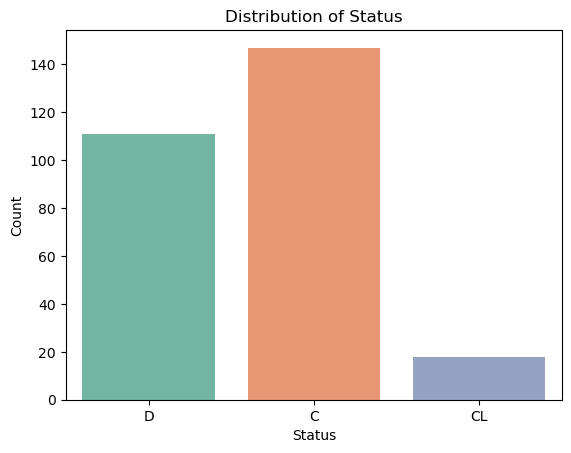

Death Rate: 40.22%.


In [8]:
# Create a count plot
sns.countplot(data=df, x='Status', palette='Set2')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Calculate death rate of patients
death = len(df[df.Status == 'D'])
death_rate = round((death / len(df))*100, 2)
print("Death Rate: "+ str(death_rate) + "%.")

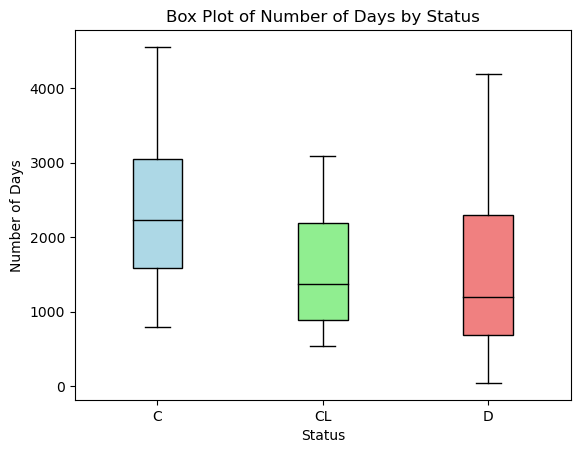

ANOVA F-statistic: 25.49
ANOVA p-value: 0.0000
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     C     CL -880.1712 0.0019 -1483.2679 -277.0745   True
     C      D -883.2328    0.0 -1186.9222 -579.5434   True
    CL      D   -3.0616 0.9999  -616.7346  610.6115  False
----------------------------------------------------------


In [11]:
# Extract data for different 'Status' categories
c_days = df['N_Days'][df['Status'] == 'C']
cl_days = df['N_Days'][df['Status'] == 'CL']
d_days = df['N_Days'][df['Status'] == 'D']

# Create a list of data to be plotted
data_to_plot = [c_days, cl_days, d_days]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
boxplot = ax.boxplot(data_to_plot, labels=['C', 'CL', 'D'], patch_artist=True)

# Customize boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the color of the median line
for median in boxplot['medians']:
    median.set_color('black')

# Add labels and title
ax.set_xlabel('Status')
ax.set_ylabel('Number of Days')
ax.set_title('Box Plot of Number of Days by Status')

# Show the plot
plt.show()

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(c_days, cl_days, d_days)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')

# Perform Tukey's test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(df['N_Days'], df['Status'])
print(tukey_results)

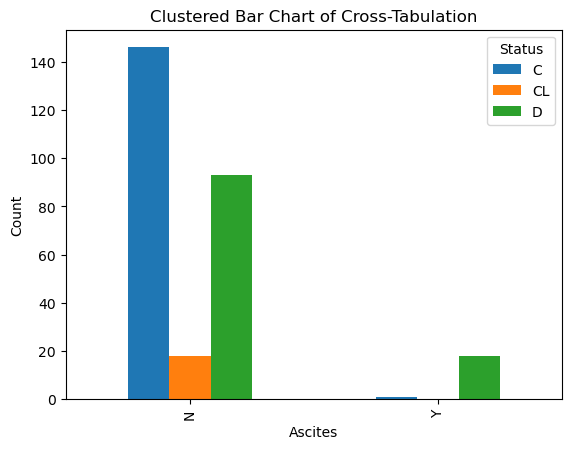

Cross-Tabulation:
Status     C  CL   D
Ascites             
N        146  18  93
Y          1   0  18
P-value: 3.309697837265323e-06


In [15]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Ascites'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Ascites")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)